In [1]:
import numpy as np
import matplotlib.pyplot as plt

[ 2.38244098  2.19571101  1.7258227  ...,  1.36430885  2.19595192
  1.58951156]
[ 0.35377358  0.77751572  0.36871069]
[ 0.35377358  0.77751572  0.36871069]


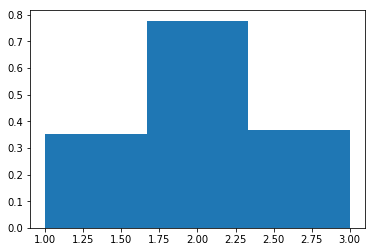

In [2]:
loc        = 2
scale      = 0.5
size       = 10000
range_from = 1
range_to   = 3
bins       = 3

x = np.random.normal(loc, scale, size)
a = plt.hist(x, normed=True, range=(range_from, range_to), bins=bins)
b = np.histogram(x, normed=True, range=(range_from, range_to), bins=bins)
print(x)
print(a[0])
print(b[0])
plt.show()

[ 1.1760915   1.75664755  1.05759779 ...,  1.3311512   1.78496907
  1.47137005]
[ 0.96155507  1.00237014  0.96875773  0.96635684  0.97956172  0.97235906
  0.99516748  1.03238123  1.04798699  1.037183    1.04318522  0.99756837]
[ 0.96155507  1.00237014  0.96875773  0.96635684  0.97956172  0.97235906
  0.99516748  1.03238123  1.04798699  1.037183    1.04318522  0.99756837]


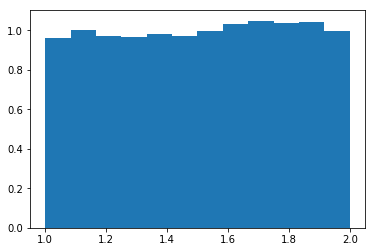

In [3]:
x = np.random.uniform(1, 2, 10000)
a = plt.hist(x, normed=True, bins=12)
b = np.histogram(x, normed=True, bins=12)
print(x)
print(a[0])
print(b[0])
plt.show()

[ 1.17889492  1.56711076  1.00781991 ...,  1.01376538  1.66065728
  1.40114568]
[ 1.04891077  1.03450925  1.04891077  1.04050989  0.94209949  1.03570938
  0.95410076  0.9469      1.01770748  0.97450292  0.95890127  0.99850545]
[ 1.04891077  1.03450925  1.04891077  1.04050989  0.94209949  1.03570938
  0.95410076  0.9469      1.01770748  0.97450292  0.95890127  0.99850545]


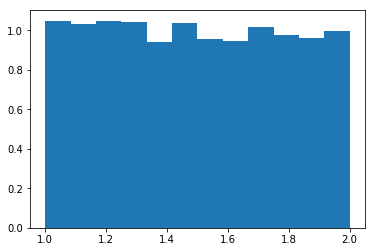

In [4]:
x = np.random.uniform(1, 2, 10000)
a = plt.hist(x, bins=12, normed=True)
b = np.histogram(x, normed=True, bins=12)
print(x)
print(a[0])
print(b[0])
plt.show()

85
[  0.   0.   0.   0.   0.  10.   0.   0.   0.   0.]


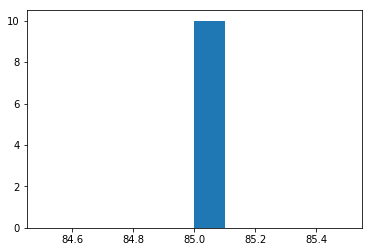

In [5]:
x = np.random.binomial(100, 0.9, 1)
print(x[0])
a1 = plt.hist(x, normed=True)
print(a1[0])
plt.show()

In [6]:
x = np.random.multinomial(1, [1.0], 1)
# print(x)
print(x[0])
# plt.hist(x, normed=True, range=(0, 4), bins=4)
# b = np.histogram(x, normed=True, range=(0, 4), bins=4)
# print(b[0])
# for i in b:
#     print(i)
# plt.show()

[1]


In [7]:
np.random.multinomial(1000, [0.2, 0.1, 0.1, 0.2], 1)

array([[202, 102, 103, 593]])

In [8]:
d = np.random.multinomial(1000, list({"1": 0.2, "2": 0.1, "3": 0.1, "4": 0.2}.values()), 1)
list(d[0])

[176, 106, 91, 627]

In [9]:
init = {
    "MODE": "uniform",
    "LOW": 0.01,
    "HIGH": 0.02,
    "SIZE": 10000
}
choices = {
    "1": 1,
    "2": 2,
    "3": 3
}
cnt_choices = len(choices)
x = np.random.uniform(init['LOW'], init['HIGH'], init['SIZE'])
d = np.histogram(x, normed=True, bins=cnt_choices)
print(x)
print(cnt_choices)
dict_keys = []
for k in range(1, cnt_choices+1):
    dict_keys.append(str(k)) 
print(dict_keys)
a = dict(zip(dict_keys, d[0]))
print(a)


[ 0.01941602  0.01991378  0.01056819 ...,  0.01269828  0.01980089
  0.01981583]
3
['1', '2', '3']
{'1': 102.40438919976903, '2': 96.793600808220006, '3': 100.84416996789443}


In [10]:
class Probability():
    """
    確率計算
    """
    def random_select(self, probabilities):
        """
        設定された確率分布からのランダム選出
        :param dict probabilities: 確率分布
        :return: selected dict_key
        """
        val = np.random.rand()
        distribution = self.get_remap_distribution_split(probabilities)
        for key in distribution:
            if distribution[key] >= val:
                return key
        return None

    @staticmethod
    def get_remap_value(old_value, old_min, old_max, new_min, new_max):
        """
        リマップされた値を取得
        :param float old_value: リマップ前の値
        :param float old_min: リマップ前のレンジ最小値
        :param float old_max: リマップ前のレンジ最大値
        :param float new_min: リマップ後のレンジ最小値
        :param float new_max: リマップ後のレンジ最大値
        :return: float リマップ後の値
        """
        return ((old_value - old_min) / (old_max - old_min)) * (new_max - new_min) + new_min

    @classmethod
    def get(cls, key, probabilities):
        """
        リマップされた確率分布から指定のキーの確率を取得
        :param string key: 確率分布内のキー
        :param dict probabilities: 確率分布
        :return: float
        """
        total = sum(probabilities.values())
        if key in probabilities:
            return cls.get_remap_value(probabilities[key], .0, total, .0, 1.0)
        return None

    @classmethod
    def get_remap_distribution(cls, probabilities):
        """
        確率分布をリマップして取得
        :param dict probabilities: リマップ前の確率分布
        :return: dict リマップ後の確率分布
        """
        remap_probabilities = {}
        accumulation = 0
        for key in probabilities:
            remap_probabilities[key] = cls.get(key, probabilities)
        return remap_probabilities

    @classmethod
    def get_remap_distribution_split(cls, probabilities):
        """
        確率分布をリマップし、最大1.0になるように分割して取得
        :param dict probabilities: リマップ前の確率分布
        :return: dict リマップ後の確率分布
        """
        remap_probabilities = {}
        accumulation = 0
        for key in probabilities:
            accumulation += cls.get(key, probabilities)
            remap_probabilities[key] = accumulation
        return remap_probabilities

def convert_probability_distribution2(init, choices):
    cnt_choices = len(choices)
    dict_keys = []
    for k in range(1, cnt_choices + 1):
        dict_keys.append(str(k))
    if init['MODE'] == "uniform":
        x = np.random.uniform(init['LOW'], init['HIGH'], init['SIZE'])
        d = np.histogram(x, normed=True, bins=cnt_choices)
        distribution = dict(zip(dict_keys, d[0]))
    elif init['MODE'] == "binomial":
        x = np.random.binomial(init['TRIALS_NUM'], init['PROBABILITY'], init['SIZE'])
        if init['CHOICE'] == "1":
            key1 = x[0]
            key2 = (init['TRIALS_NUM'] - x[0])
        else:
            key1 = (init['TRIALS_NUM'] - x[0])
            key2 = x[0]
        distribution = {"1": key1, "2": key2}
    elif init['MODE'] == "normal":
        x = np.random.normal(init['MEAN'], init['VARIANCE'], init['SIZE'])
        d = np.histogram(x, normed=True, range=(0, cnt_choices), bins=cnt_choices)
        distribution = dict(zip(dict_keys, d[0]))
    p = Probability()
    print(distribution)
    print(p.get_remap_distribution(distribution))
    print(p.get_remap_distribution_split(distribution))
    return p.get_remap_distribution(distribution)

init = {
    "MODE": "uniform",
    "LOW": 0.01,
    "HIGH": 0.02,
    "SIZE": 10000
}
choices = {
    "1": 1,
    "2": 2,
    "3": 3
}

# init = {
#                         "MODE": "binomial",
#                         "TRIALS_NUM": 1000,
#                         "PROBABILITY": 0.2,
#                         "SIZE": 1,
#                         "CHOICE": "1",
#                         "SWITCH_AFTER_CHOICE": True
# }
# choices = {
#                     "1": "input",
#                     "2": "empty"
# }

# init = {
#                                 "MODE": "normal",
#                                 "MEAN": 3,
#                                 "VARIANCE": 0.2,
#                                 "SIZE": 10000
# }
# choices = {
#                     "1": 100,
#                     "2": 200,
#                     "3": 300,
#                     "4": 400,
#                     "5": 500
# }

pro_dist = convert_probability_distribution2(init, choices)
p = Probability()
print(p.get_remap_distribution_split(pro_dist))

{'1': 97.583589848326625, '2': 101.06550200532628, '3': 101.51574926700727}
{'1': 0.3251, '2': 0.3367, '3': 0.33819999999999995}
{'1': 0.3251, '2': 0.66179999999999994, '3': 0.99999999999999989}
{'1': 0.32510000000000006, '2': 0.66180000000000017, '3': 1.0000000000000002}


In [11]:
class Bill():
    def __init__(self, description):
        self.description = description

class Tail():
    def __init__(self, length):
        self.length = length

class Duck():
    def __init__(self, bill, tail):
        self.bill = bill
        self.tail = tail

    def about(self):
        print(self.bill.description, self.tail.length)

bill = Bill('wide orange')
tail = Tail('long')
duck = Duck(bill, tail)
duck.about()


wide orange long


In [12]:
import datetime
d = datetime.datetime.strptime("1998/01/01", '%Y/%m/%d')
# d += datetime.timedelta({'weeks': 1})
# print(d)
key = 'weeks'
val = 3
q_dict = {key: val}
aaa = {}
for i in range(1, 13):
    d += datetime.timedelta(**q_dict)
#     print("{0:%Y/%m/%d}".format(d))
    aaa[str(i)] = "{0:%Y/%m/%d}".format(d)
aaa

{'1': '1998/01/22',
 '10': '1998/07/30',
 '11': '1998/08/20',
 '12': '1998/09/10',
 '2': '1998/02/12',
 '3': '1998/03/05',
 '4': '1998/03/26',
 '5': '1998/04/16',
 '6': '1998/05/07',
 '7': '1998/05/28',
 '8': '1998/06/18',
 '9': '1998/07/09'}

In [13]:
import copy

dict_PPAP = {
    "PP": ['pen', 'pineapple'], 
    "AP": ['apple', 'pen'], 
    "PPAP": ['pen', 'pineapple', 'apple', 'pen']
}

def restore_acronym(dic, key, default = []):
#     cp_dic = copy.deepcopy(dic)
    if key in dic:
        return dic[key]
    else:
        return default

my_list = restore_acronym(dict_PPAP, "PA")
print(my_list)

my_list.append("pico")
my_list.append("taro")
print(my_list)
print(restore_acronym(dict_PPAP, "BANANA"))

[]
['pico', 'taro']
['pico', 'taro']


In [58]:
aa = {
    "WHERE": {
        "AND": {
            "zip1": 1,
            "zip2": 2,
        },
        "EXCLUDE": {
            "city": 3
        }
    }
}
query_dict = {}
for key, conditions in aa["WHERE"].items():
    tmp = {}
    for column, value in conditions.items():
        tmp[column] = value
    query_dict[key] = tmp

print(query_dict['AND'])

{'zip1': 1, 'zip2': 2}


In [52]:
import copy
settings = {
    "aa": {
        "aa_1": {
            "aa_1_1": 1,
            "aa_1_2": 2,
        },
        "aa_2": {
            "aa_2_1": 3,
        }
    },
    "bb": {
        "bb_1": {
            "bb_1_1": 4
        },
    }
}

def set_setting(settings, key_path, value):
    paths = key_path.split("__")
    cnt = len(paths)
    i = 1
    for key in paths:
        if i != cnt and isinstance(settings, dict) and key in settings:
            settings = settings[key]
        else:
            settings[key] = value
        i += 1

def set_setting2(settings, key_path, value, cnt_sec):
    cnt_sec += 1
    paths = key_path.split("__")
    cnt = len(paths)
    i = 1
    for key in paths:
        if i != cnt and isinstance(settings, dict) and key in settings:
            settings = settings[key]
        else:
            settings[key] = value
        i += 1

cnt_sec = 0
print(settings)
print(cnt_sec)
set_setting2(settings, "aa__aa_1__aa_1_2", 5, cnt_sec)
print(settings)
print(cnt_sec)


{'aa': {'aa_1': {'aa_1_1': 1, 'aa_1_2': 2}, 'aa_2': {'aa_2_1': 3}}, 'bb': {'bb_1': {'bb_1_1': 4}}}
0


TypeError: set_setting2() takes 3 positional arguments but 4 were given

In [49]:
aa = ["aa", "bb"]
print("aa" in aa)

True


In [58]:
def test():
    return "a", {"a":1, "b":2}

val = test()
print(val)
print(val[1]["a"])

('a', {'a': 1, 'b': 2})
1


In [60]:
from datetime import datetime
datetime.now()

datetime.datetime(2018, 1, 9, 0, 21, 21, 495268)